In [ ]:
1. Radioactive decay chain

 decays to 
 with a half-life  of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability 
. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time
Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution 
 
 to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [8]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
tau = 60*3.052 #sec

def prob(t):
    return 1-2**(-(t)/(tau))

time = [i for i in range(1,1000+1)]
t = []
p = []
t_number = 1000
p_number = 0

for i in time:
    if (np.random.uniform(0,1) < decay_prob(i) and t_number > 0):
        t_number -= 1
        p_number += 1
    t.append(t_number)
    p.append(p_number)
    
#make a plot    
plt.plot(time,t,c="g")
plt.plot(time,p,c="y")
plt.xlabel("time")
plt.ylabel("the number of atoms")
plt.legend()
plt.show()

def prob_d(p):
    return -np.log(1-p)/(np.log(2)/(tau))

t_number = prob_d(np.random.uniform(0,1,1000))
#make a plot
fig, n = plt.subplots(1,1)
n.hist(t_number,bins=30,cumulative=-1)
n.set_ylabel("the number of atoms")
n.set_xlabel("time")

NameError: name 'decay_prob' is not defined

In [ ]:
2. Monte Carlo integration: hit/miss vs mean value method

Consider the function:

 
Plot the function and compute the integral of  between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral  times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

1.3356
0.006311430726039858
1.343083913617691
0.006569207583704359


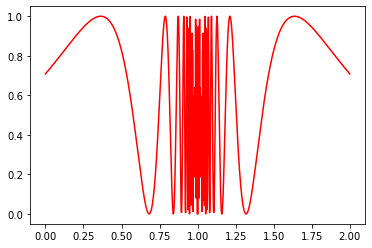

In [6]:
def f(x):
    return (np.sin(1/(1-x)))**2

x=np.linspace(0, 2, 1000)
plt.plot(x, f(x), 'r-')

def H(f,N,h,a,b):
    hi = 0
    for i in range(N):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, h)
        if y < f(x):
            hi += 1
        val = (b-a)*h*hi/N
    return val , 0.67*math.sqrt(val*((b-a)*h-val)/N)

I, error = H(f,10000,1,0,2)
print(I)
print(error)

def mean_v(f,N,a,b):
    conv = []
    for i in range(N):
        x = np.random.uniform(a, b)
        conv.append(f(x))
    return (b-a)*np.sum(conv)/N, (b-a)*np.std(conv)/math.sqrt(N)

I, error = mean_v(f,10000,0,2)
print(I)
print(error)

In [ ]:
3. Monte Carlo integration in high dimension

Compute the area of a circle of unit radius, by integrating the function:
 
Generalize the result for a 10D sphere.

In [4]:
def y(x):
    return np.sqrt(1-(x**2))

def mv(f,N,a,b):
    conv = []
    for i in range(N):
        x = np.random.uniform(a, b)
        conv.append(f(x))
    return 4*(b-a)*np.sum(conv)/N

I = mv(y,10000,0,1)
print(I)

def f(x):
    a = sum(i**2 for i in x)
    if a <=1: 
        return 1
    else: 
        return 0

N = 1000000
it = 0

for i in range(N):
    x = np.random.uniform(-1,1,10)
    if f(x)==1: 
        it += 1

print((2**10)*it/N)

3.139946507846436
2.542592


In [ ]:
4. Monte Carlo integration with importance sampling

Calculate the value of the integral:

 
using the importance sampling method with . You should expect a result around 0.84.

In [7]:
def w(x):
    return 1/np.sqrt(x)

def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

def samp_m(n,a,b):
    x = np.random.uniform(a, b,n)
    return np.sum(f(x*x*0.25)/w(x*x*0.25)) * 2.0

print(samp_m(1000000,0,1.0))

958428.0031465344
